In [66]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [67]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split

In [68]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
# data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
# data.head(1)
# data.info()

In [69]:
data.duplicated().sum()
data.drop_duplicates(keep='first', subset=None, inplace=True, ignore_index=False)
data.duplicated().sum()

0

In [70]:
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_val = ['age','trestbps','chol','thalach','oldpeak' ]
x = data.drop(columns=['target'], axis=1)
y = data.target
orig_sex_val = data.sex

In [71]:
encode_data = [('num', StandardScaler(), num_val), ('cat', OrdinalEncoder(), cat_val)]
coltran_data = ColumnTransformer(transformers=encode_data)
x = coltran_data.fit_transform(x)

In [72]:
ord_val_sex = data.sex 

orig_sex_dic = np.unique(orig_sex_val)
ord_sex_dic = np.unique(ord_val_sex)

sex_dic = dict(zip(orig_sex_dic, ord_sex_dic))
sex_dic

{0: 0, 1: 1}

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [74]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred = logreg.predict(x_test)

In [76]:
accu_logreg = accuracy_score(y_test,y_pred)


perf_accu = pd.DataFrame([ 
    'LogisticRegression', accu_logreg
]).transpose()

perf_accu.columns = ['Method', 'Test Accuracy Score']
perf_accu

,Method,Test Accuracy Score
0,LogisticRegression,0.824176


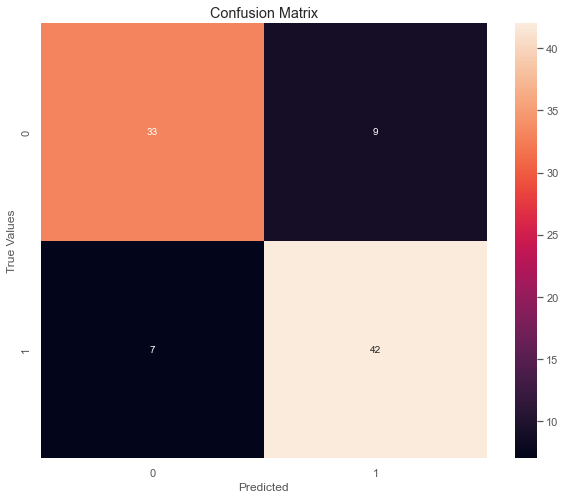

In [77]:
cm_dic = {
    'y_test': y_test,
    'y_pred': y_pred
}

cm_cols = pd.DataFrame(cm_dic, columns=['y_test', 'y_pred'])
confusion_matrix = pd.crosstab(cm_cols['y_test'], cm_cols['y_pred'], rownames=['True Values'], colnames=['Predicted'])

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Confusion Matrix')
sns.heatmap(confusion_matrix, annot=True)

plt.show()

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Knn Accuracy Score'}>

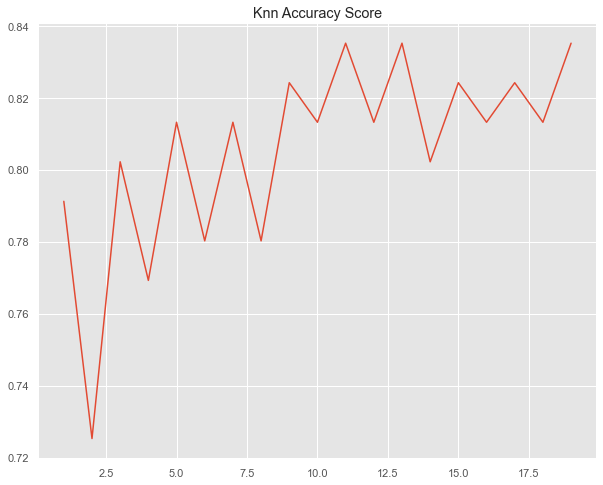

In [78]:
accuracies = []

for N in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_test, y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax =plt.subplots(figsize=(10,8))
ax.set_title('Knn Accuracy Score')

sns.lineplot(np.arange(1,20), accuracies)

In [79]:
best_k = 1 + np.argmax(accuracies)
best_acc = np.max(accuracies)

In [80]:
mod_accu_per = pd.DataFrame([
    'KNeighborsClassifier', best_k, best_acc
]).transpose()
mod_accu_per.columns = ['Method', 'Best K Value', 'Best Accuracy Score Value']
mod_accu_per

,Method,Best K Value,Best Accuracy Score Value
0,KNeighborsClassifier,11,0.835165
